In [137]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine, utils
import torchinfo

In [138]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
data_path = Path("data/")
image_path = data_path / "soil_images_sorted"

In [140]:
# Get a set of pretrained model weights
weights = torchvision.models.AlexNet_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [141]:
#HyperParameters
batch_Size = 5
learning_rate = 0.0001
epochS = 50
dropout_prob = 0.2

In [142]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [143]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=batch_Size)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x2bab770dfa0>,
 ['high', 'low', 'medium'])

In [144]:
model = torchvision.models.alexnet(weights=weights).to(device)

In [145]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
# for param in model.features.parameters():
#     param.requires_grad = False

In [146]:
# Check if any parameter in model.features will compute gradients
any_grad_computation = not any(param.requires_grad for param in model.features.parameters())
any_grad_computation

False

In [147]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_prob, inplace=True), 
    nn.Linear(in_features=9216, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [148]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [149]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=epochS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  2%|▏         | 1/50 [00:26<21:30, 26.33s/it]

Epoch: 1 | train_loss: 0.7631 | train_acc: 0.6265 | test_loss: 0.6128 | test_acc: 0.7000


  4%|▍         | 2/50 [00:56<22:39, 28.32s/it]

Epoch: 2 | train_loss: 0.2905 | train_acc: 0.8882 | test_loss: 0.3097 | test_acc: 0.8444


  6%|▌         | 3/50 [01:23<21:48, 27.84s/it]

Epoch: 3 | train_loss: 0.1072 | train_acc: 0.9676 | test_loss: 0.3548 | test_acc: 0.8444


  8%|▊         | 4/50 [01:52<21:50, 28.49s/it]

Epoch: 4 | train_loss: 0.1275 | train_acc: 0.9441 | test_loss: 0.2681 | test_acc: 0.9444


 10%|█         | 5/50 [02:22<21:47, 29.05s/it]

Epoch: 5 | train_loss: 0.1437 | train_acc: 0.9471 | test_loss: 0.3804 | test_acc: 0.8889


 12%|█▏        | 6/50 [02:49<20:43, 28.26s/it]

Epoch: 6 | train_loss: 0.0343 | train_acc: 0.9971 | test_loss: 0.2708 | test_acc: 0.9333


 14%|█▍        | 7/50 [03:15<19:43, 27.52s/it]

Epoch: 7 | train_loss: 0.0038 | train_acc: 1.0000 | test_loss: 0.1250 | test_acc: 0.9333


 16%|█▌        | 8/50 [03:43<19:20, 27.64s/it]

Epoch: 8 | train_loss: 0.0011 | train_acc: 1.0000 | test_loss: 0.0626 | test_acc: 0.9889


 18%|█▊        | 9/50 [04:10<18:50, 27.58s/it]

Epoch: 9 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 0.0940 | test_acc: 0.9556


 20%|██        | 10/50 [04:39<18:34, 27.85s/it]

Epoch: 10 | train_loss: 0.0009 | train_acc: 1.0000 | test_loss: 0.0878 | test_acc: 0.9667


 22%|██▏       | 11/50 [05:07<18:13, 28.04s/it]

Epoch: 11 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 0.0839 | test_acc: 0.9667


 24%|██▍       | 12/50 [05:34<17:30, 27.65s/it]

Epoch: 12 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 0.0520 | test_acc: 0.9889


 26%|██▌       | 13/50 [06:01<16:50, 27.32s/it]

Epoch: 13 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 0.0736 | test_acc: 0.9778


 28%|██▊       | 14/50 [06:27<16:12, 27.02s/it]

Epoch: 14 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0863 | test_acc: 0.9556


 30%|███       | 15/50 [06:54<15:47, 27.07s/it]

Epoch: 15 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0883 | test_acc: 0.9667


 32%|███▏      | 16/50 [07:22<15:30, 27.36s/it]

Epoch: 16 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0825 | test_acc: 0.9667


 34%|███▍      | 17/50 [07:50<15:07, 27.49s/it]

Epoch: 17 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0973 | test_acc: 0.9556


 36%|███▌      | 18/50 [08:21<15:12, 28.52s/it]

Epoch: 18 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0945 | test_acc: 0.9556


 38%|███▊      | 19/50 [08:49<14:38, 28.34s/it]

Epoch: 19 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0973 | test_acc: 0.9556


 40%|████      | 20/50 [09:15<13:48, 27.61s/it]

Epoch: 20 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1479 | test_acc: 0.9444


 42%|████▏     | 21/50 [09:42<13:18, 27.52s/it]

Epoch: 21 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.0963 | test_acc: 0.9667


 44%|████▍     | 22/50 [10:09<12:44, 27.31s/it]

Epoch: 22 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.0998 | test_acc: 0.9667


 46%|████▌     | 23/50 [10:37<12:24, 27.59s/it]

Epoch: 23 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 0.1101 | test_acc: 0.9556


 48%|████▊     | 24/50 [11:06<12:05, 27.91s/it]

Epoch: 24 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1206 | test_acc: 0.9556


 50%|█████     | 25/50 [11:33<11:34, 27.79s/it]

Epoch: 25 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1183 | test_acc: 0.9556


 52%|█████▏    | 26/50 [12:00<11:01, 27.55s/it]

Epoch: 26 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1250 | test_acc: 0.9556


 54%|█████▍    | 27/50 [12:26<10:18, 26.88s/it]

Epoch: 27 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1320 | test_acc: 0.9556


 56%|█████▌    | 28/50 [12:53<09:52, 26.94s/it]

Epoch: 28 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1274 | test_acc: 0.9556


 58%|█████▊    | 29/50 [13:19<09:22, 26.77s/it]

Epoch: 29 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1255 | test_acc: 0.9556


 60%|██████    | 30/50 [13:44<08:45, 26.28s/it]

Epoch: 30 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1228 | test_acc: 0.9556


 62%|██████▏   | 31/50 [14:09<08:13, 25.99s/it]

Epoch: 31 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1293 | test_acc: 0.9556


 64%|██████▍   | 32/50 [14:35<07:46, 25.90s/it]

Epoch: 32 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1289 | test_acc: 0.9556


 66%|██████▌   | 33/50 [15:01<07:18, 25.82s/it]

Epoch: 33 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1215 | test_acc: 0.9556


 68%|██████▊   | 34/50 [15:27<06:53, 25.84s/it]

Epoch: 34 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1271 | test_acc: 0.9556


 70%|███████   | 35/50 [15:52<06:26, 25.74s/it]

Epoch: 35 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1256 | test_acc: 0.9556


 72%|███████▏  | 36/50 [16:18<05:58, 25.64s/it]

Epoch: 36 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1083 | test_acc: 0.9667


 74%|███████▍  | 37/50 [16:43<05:32, 25.60s/it]

Epoch: 37 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1167 | test_acc: 0.9556


 76%|███████▌  | 38/50 [17:10<05:10, 25.84s/it]

Epoch: 38 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1177 | test_acc: 0.9556


 78%|███████▊  | 39/50 [17:36<04:45, 25.91s/it]

Epoch: 39 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1150 | test_acc: 0.9556


 80%|████████  | 40/50 [18:02<04:19, 25.92s/it]

Epoch: 40 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1240 | test_acc: 0.9556


 82%|████████▏ | 41/50 [18:27<03:52, 25.85s/it]

Epoch: 41 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1252 | test_acc: 0.9556


 84%|████████▍ | 42/50 [18:52<03:25, 25.67s/it]

Epoch: 42 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1152 | test_acc: 0.9667


 86%|████████▌ | 43/50 [19:18<02:58, 25.53s/it]

Epoch: 43 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1257 | test_acc: 0.9556


 88%|████████▊ | 44/50 [19:43<02:32, 25.47s/it]

Epoch: 44 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1355 | test_acc: 0.9556


 90%|█████████ | 45/50 [20:09<02:07, 25.50s/it]

Epoch: 45 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1382 | test_acc: 0.9556


 92%|█████████▏| 46/50 [20:34<01:41, 25.38s/it]

Epoch: 46 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1480 | test_acc: 0.9556


 94%|█████████▍| 47/50 [20:59<01:15, 25.26s/it]

Epoch: 47 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1391 | test_acc: 0.9556


 96%|█████████▌| 48/50 [21:24<00:50, 25.19s/it]

Epoch: 48 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1788 | test_acc: 0.9556


 98%|█████████▊| 49/50 [21:49<00:25, 25.22s/it]

Epoch: 49 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1761 | test_acc: 0.9556


100%|██████████| 50/50 [22:14<00:00, 26.69s/it]

Epoch: 50 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 0.1580 | test_acc: 0.9556
[INFO] Total training time: 1334.498 seconds


In [150]:
utils.write_result_csv("../model_results_csvs/alexnetresults.csv",
                       batch_Size,
                       learning_rate,
                       epochS,
                       dropout_prob,
                       any_grad_computation,
                    #results
                        results["train_loss"],
                        results["train_acc"],
                        results["test_loss"],
                        results["test_acc"])

Inserted new data in ../model_results_csvs/alexnetresults.csv


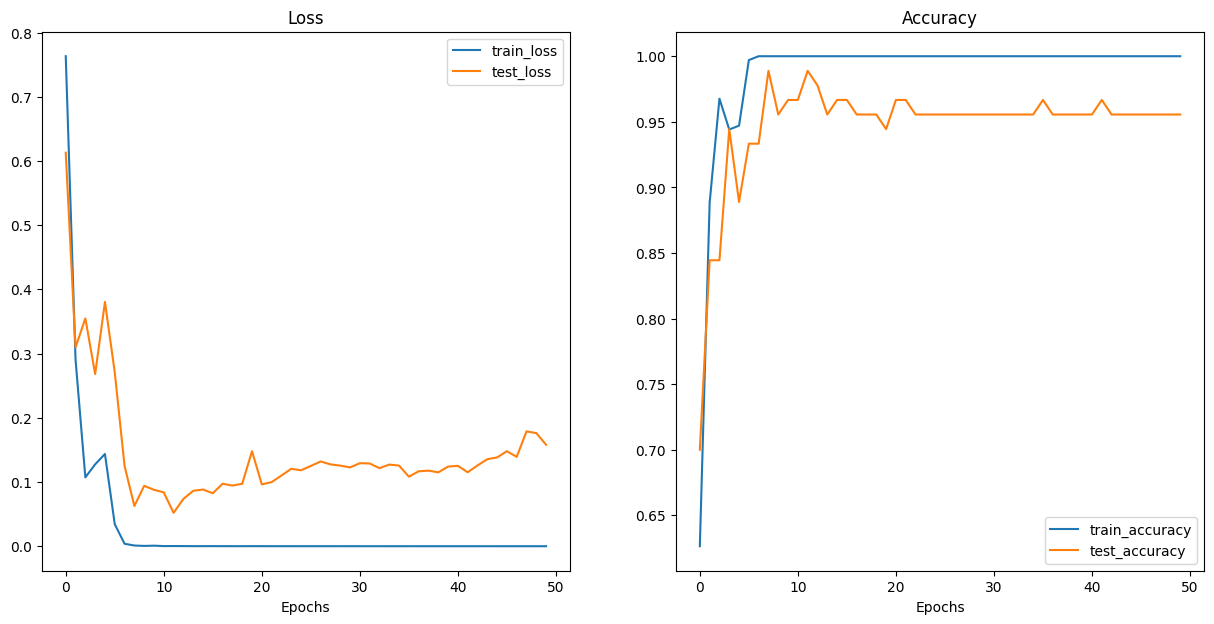

In [151]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [152]:
from winsound import Beep
Beep(300, 800)

In [153]:
# utils.save_model(model=model,
#                  target_dir="models",
#                  model_name="alexnet1.pth")